IMPORTING LIBRARIES WE ARE GOING TO USE 


BUSINESS PROBLEM 

TRUECARS is a car dealership based in south africa, they are looking to expand their business to Nigeria but they do not have a sense of the market and the values of products in the market. A data scientist was hired to extract data on the Nigerian automobile market, analyze it and make predictions on the prices of cars.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#we are reading the dataset
data = pd.read_csv("nigeria_car_dataset.csv")


In [4]:
#returns the first five values in the dataset
data.head()

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,0,Toyota,2011,Foreign Used,284256.0,2500.0,Petrol,Automatic,"8,610,000",NaN
1,1,Toyota,2013,Foreign Used,168043.0,2700.0,Petrol,Automatic,"6,760,000",NaN
2,2,Mercedes-Benz,2014,Nigerian Used,233048.0,4600.0,Petrol,Automatic,"19,760,000",SUV
3,3,Ford,2015,Foreign Used,105715.0,2000.0,Petrol,Automatic,"11,907,000",SUV
4,4,Toyota,2011,Nigerian Used,198183.0,3500.0,Petrol,Automatic,"5,460,000",SUV


In [5]:
data.describe()

,Unnamed: 0,Year of manufacture,Mileage,Engine Size
count,3050.000000,3050.000000,2.999000e+03,3.024000e+03
mean,1524.500000,2007.943934,2.338023e+05,2.764444e+04
std,880.603486,4.343613,1.836908e+06,6.303307e+05
min,0.000000,1992.000000,1.000000e+00,3.000000e+02
25%,762.250000,2005.000000,1.214010e+05,2.000000e+03
50%,1524.500000,2008.000000,1.791800e+05,2.700000e+03
75%,2286.750000,2011.000000,2.487390e+05,3.500000e+03
max,3049.000000,2021.000000,1.000000e+08,2.400000e+07


Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4095 non-null   int64  
 1   Make                 4095 non-null   object 
 2   Year of manufacture  3617 non-null   float64
 3   Condition            3616 non-null   object 
 4   Mileage              4024 non-null   float64
 5   Engine Size          3584 non-null   float64
 6   Fuel                 3607 non-null   object 
 7   Transmission         4075 non-null   object 
 8   Price                4095 non-null   object 
 9   Build                1127 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 320.0+ KB


In [6]:
#removing the comma in the values of the price column
data['Price'].replace(to_replace=',', value='', regex=True, inplace=True)

In [7]:
#converting the price value object to float
data["Price"] = data["Price"].astype("float64")

Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3050 non-null   int64  
 1   Make                 3050 non-null   object 
 2   Year of manufacture  3050 non-null   int64  
 3   Condition            3050 non-null   object 
 4   Mileage              2999 non-null   float64
 5   Engine Size          3024 non-null   float64
 6   Fuel                 3049 non-null   object 
 7   Transmission         3050 non-null   object 
 8   Price                3050 non-null   float64
 9   Build                921 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 238.4+ KB


In [9]:
#Generate descriptive statistics.
data.describe()

,Unnamed: 0,Year of manufacture,Mileage,Engine Size,Price
count,3050.000000,3050.000000,2.999000e+03,3.024000e+03,3.050000e+03
mean,1524.500000,2007.943934,2.338023e+05,2.764444e+04,4.682860e+06
std,880.603486,4.343613,1.836908e+06,6.303307e+05,5.069384e+06
min,0.000000,1992.000000,1.000000e+00,3.000000e+02,6.825000e+05
25%,762.250000,2005.000000,1.214010e+05,2.000000e+03,2.190000e+06
50%,1524.500000,2008.000000,1.791800e+05,2.700000e+03,3.328000e+06
75%,2286.750000,2011.000000,2.487390e+05,3.500000e+03,5.200000e+06
max,3049.000000,2021.000000,1.000000e+08,2.400000e+07,6.300000e+07


In [10]:
#check for missing values
data.isnull().sum()

Unnamed: 0                0
Make                      0
Year of manufacture       0
Condition                 0
Mileage                  51
Engine Size              26
Fuel                      1
Transmission              0
Price                     0
Build                  2129
dtype: int64

### EXPLORATORY DATA ANALYSIS

/Users/damolaosho/Desktop/Mlproject/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


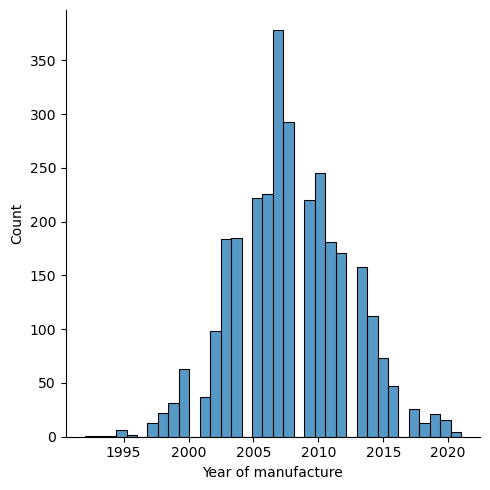

In [11]:
#data visualization
sns.displot(data['Year of manufacture'])

OBSERVATION

The dataset contains cars manufactured from the year 1995 - 2020.

Cars manufactured from the year 2005-2009 have the largest count in the dataset.

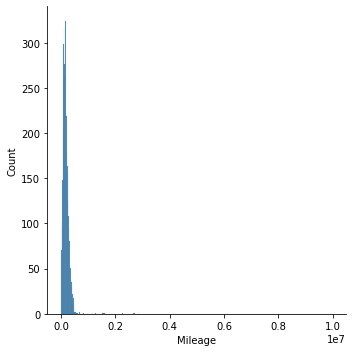

In [12]:
sns.displot(data['Mileage']);

In [13]:
q = data['Mileage'].quantile(0.99)
data = data[data['Mileage']<q]

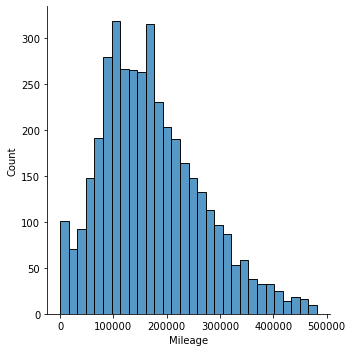

In [14]:
sns.displot(data['Mileage']);

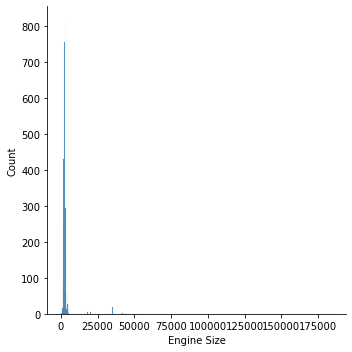

In [15]:
sns.displot(x=data['Engine Size']);

In [16]:
data = data[data['Engine Size']<8382]
data = data[data['Engine Size']>624]

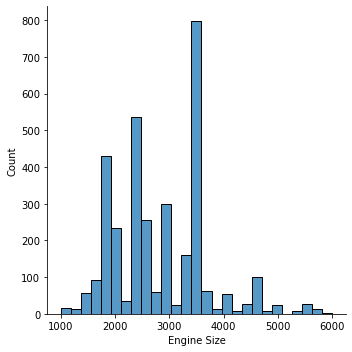

In [17]:
sns.displot(x=data['Engine Size']);

In [18]:
data.isnull().sum()

Unnamed: 0                0
Make                      0
Year of manufacture       0
Condition                 0
Mileage                   0
Engine Size               0
Fuel                      6
Transmission              2
Price                     0
Build                  2307
dtype: int64

##### THESE VIZUALISATIONS SHOW US THE RELATIONSHIP OF THE PRICE WITH OTHER VARIABLES

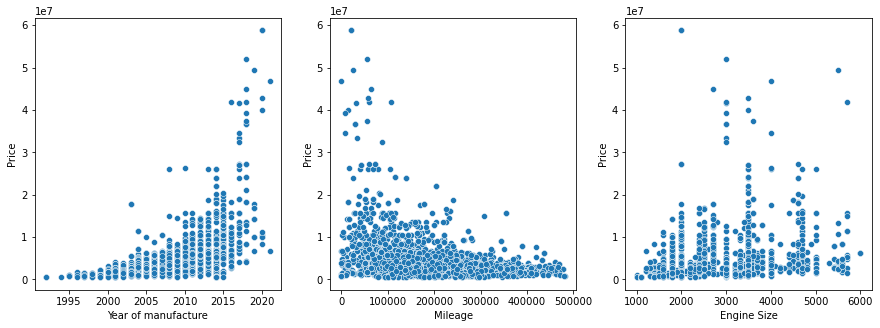

In [19]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.scatterplot(x=data['Year of manufacture'], y=data['Price'])
plt.subplot(1,3,2)
sns.scatterplot(x=data['Mileage'], y=data['Price'])
plt.subplot(1,3,3)
sns.scatterplot(x=data['Engine Size'], y=data['Price']);

OBSERVATION
1. The selling price of automobiles increase with the years, this means a car made in 2010 will be sold for a higher price than a car made in 2000.

2. The higher the mileage a car has on it, the lower the value.


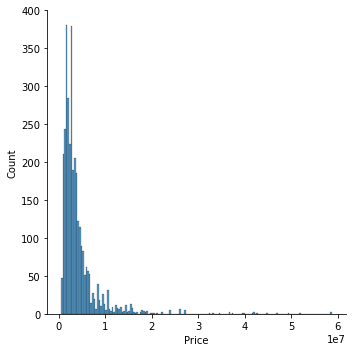

In [21]:
sns.displot(x=data['Price'])

In [22]:
log_price = np.log(data['Price'])

data['log_price'] = log_price

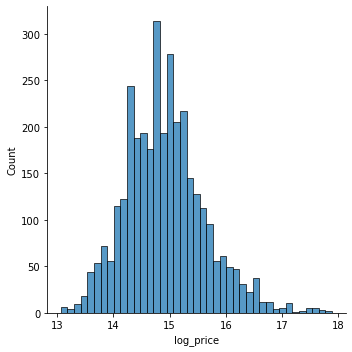

In [24]:
sns.displot(x=data['log_price']);

In [14]:
data['Transmission'].value_counts()

Transmission
Automatic    2859
Manual        164
CVT            26
AMT             1
Name: count, dtype: int64

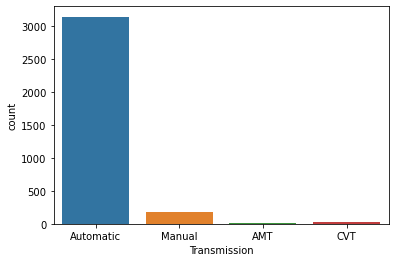

In [25]:
sns.countplot(x=data['Transmission'])

OBSERVATION

Automatic cars largely populate the dataset obtained which indicates that there is high demand for automatic cars in nigeria.

In [12]:
data['Fuel'].value_counts()

Fuel
Petrol      3013
Hybrid        30
Diesel         5
Electric       1
Name: count, dtype: int64

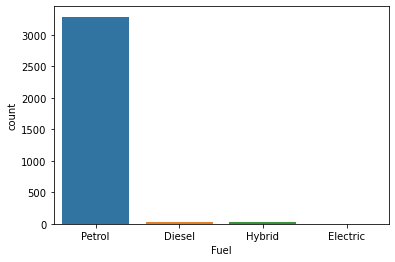

In [26]:
sns.countplot(x=data['Fuel'])

OBSERVATION

Cars that run on petrol have the highest count in the dataset whicb indicates that the Nigerian automobile market has a high demand for petroleum feuled cars

In [13]:
data['Condition'].value_counts()

Condition
Nigerian Used    2359
Foreign Used      682
Brand New           9
Name: count, dtype: int64

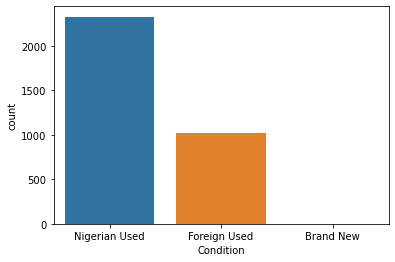

In [27]:
sns.countplot(x=data['Condition'])

In [28]:
#count the number of distinct elements in a specified axis
data['Make'].nunique()

40

OBSERVATION

There are 40 unique car makes spread across the dataset obtained.

In [23]:
data['Make'].value_counts()

Make
Toyota           1259
Honda             335
Mercedes-Benz     280
Lexus             277
Hyundai           123
Ford              119
Nissan            111
Kia                68
BMW                56
Peugeot            53
Volkswagen         53
Acura              50
Mazda              48
Land Rover         41
Infiniti           22
Mitsubishi         20
Chevrolet          17
Pontiac            17
Audi               17
Dodge              15
Volvo              12
Jeep                8
Opel                5
GMC                 5
Jaguar              5
Subaru              4
Cadillac            4
Saturn              3
Mini                3
Renault             3
Chrysler            3
Scion               2
GAC                 2
Geely               2
Suzuki              2
Oldsmobile          1
Rover               1
Skoda               1
Lincoln             1
Porsche             1
Tata                1
Name: count, dtype: int64

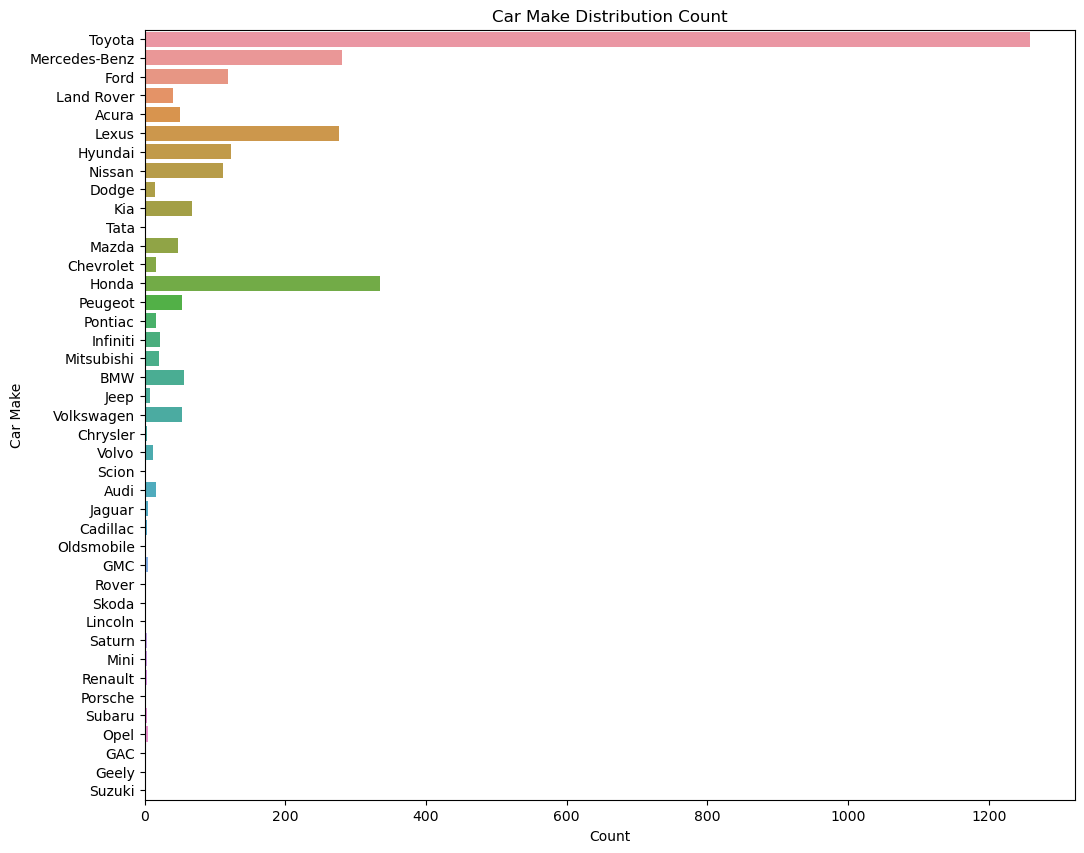

In [22]:

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(12, 10))
ax = sns.countplot(y='Make', data=data, orient='h')

# Rotate y-axis labels to be horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Car Make')
plt.title('Car Make Distribution Count')

# Show the plot
plt.show()


OBSERVATION

Toyota has the highest count in the dataset which indicates that toyota cars are the most sought cars in Nigeria

#### MODEL TRAINING AND TESTING

In [29]:
#removes these features from the dataset
data.drop(['Unnamed: 0','Make'], axis=1, inplace=True)

In [30]:
#replace the NaN values with 'other'
data['Build'] = data['Build'].fillna('other')

In [31]:
#returns dataset
data

,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build,log_price
0,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,3120000.0,other,14.953344
2,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,3640000.0,other,15.107494
30,2008.0,Foreign Used,301265.0,3500.0,Petrol,Automatic,4680000.0,other,15.358809
32,2011.0,Nigerian Used,105546.0,4600.0,Petrol,Automatic,14040000.0,SUV,16.457421
43,2011.0,Foreign Used,211917.0,3500.0,Petrol,Automatic,6968000.0,other,15.756839
...,...,...,...,...,...,...,...,...,...
4090,2004.0,Nigerian Used,207446.0,3500.0,Petrol,Automatic,1125000.0,other,13.933294
4091,2005.0,Nigerian Used,106914.0,1800.0,Petrol,Automatic,2643750.0,other,14.787709
4092,2006.0,Nigerian Used,247149.0,1800.0,Petrol,Automatic,1462500.0,other,14.195658
4093,2007.0,Nigerian Used,249325.0,2500.0,Petrol,Automatic,2475000.0,other,14.721751


In [32]:
#fitting the model and removing the price feature and assinging it to 'y' varaible while the remaining goes to x
X = data.drop(['Price','log_price'], axis=1)
y = data['log_price']


In [33]:
#return the data of x variable we created
X

,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Build
0,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,other
2,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,other
30,2008.0,Foreign Used,301265.0,3500.0,Petrol,Automatic,other
32,2011.0,Nigerian Used,105546.0,4600.0,Petrol,Automatic,SUV
43,2011.0,Foreign Used,211917.0,3500.0,Petrol,Automatic,other
...,...,...,...,...,...,...,...
4090,2004.0,Nigerian Used,207446.0,3500.0,Petrol,Automatic,other
4091,2005.0,Nigerian Used,106914.0,1800.0,Petrol,Automatic,other
4092,2006.0,Nigerian Used,247149.0,1800.0,Petrol,Automatic,other
4093,2007.0,Nigerian Used,249325.0,2500.0,Petrol,Automatic,other


In [34]:
cat = [cname for cname in X.columns if X[cname].dtype == 'object']
num = [cname for cname in X.columns if X[cname].dtype == 'float64' or X[cname].dtype=='int64']

IMPORTING LIBRARIES WE WILL USE FOR TRAINING AND METRICS

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

In [36]:
#splittiing the dataset into the training and testing we will use 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
cat_pipeline = Pipeline([('impute', SimpleImputer(strategy='most_frequent')),('encode', OneHotEncoder())])
num_pipeline = Pipeline([('scale', MinMaxScaler())])

full_pipeline = ColumnTransformer([('cat', cat_pipeline, cat), ('num', num_pipeline, num)])


prepared = full_pipeline.fit_transform(X_train)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

#checking to see which models will produce the best result with low error percentage

models = [('sgd',SGDRegressor()),('svm',SVR()),('forest',RandomForestRegressor()),
         ('ada', AdaBoostRegressor()),('bag',BaggingRegressor()),('extree',ExtraTreesRegressor()),
          ('grad',GradientBoostingRegressor()),('xgb',XGBRegressor())]
          
for i,j in models:
    scores = cross_val_score(j, prepared, y_train, scoring='neg_mean_squared_error', cv=10)
    rmse = np.sqrt(-scores.mean())
    print(i,rmse)

sgd 0.4360505853843787
svm 0.37289738429987146
forest 0.33016770038554427
ada 0.41189737646258756
bag 0.3445718843629451
extree 0.34251476541752723
grad 0.34354164228448125
xgb 0.3276902712777479


In [39]:
#using xgboost regressor to train the model
xgb = XGBRegressor()
xgb.fit(prepared,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb = XGBRegressor()
param_grid = [{'n_estimators':[100,300,400], 'max_depth':[4,5,6],'learning_rate':[0.1,0.3,0.5],
              'colsample_bylevel':[0.7,1]}]
              
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, 
                                   n_jobs=-1)
grid_search.fit(prepared, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [41]:
grid_search.best_params_

{'colsample_bylevel': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 300}

In [42]:
xgb = XGBRegressor(learning_rate= 0.1, max_depth= 6, n_estimators= 300, colsample_bylevel=0.7)
xgb.fit(prepared,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
test = full_pipeline.transform(X_test)

In [44]:
y_pred = xgb.predict(test)

In [45]:
y_test = y_test.values

In [46]:
t = np.exp(y_test)
p = np.exp(y_pred)

In [47]:
#calculating the mean squared error
mse = mean_squared_error(p,t)
rmse = np.sqrt(mse)
print(rmse)

1719052.8263710674


An error of 1.719052 million is good considering the range of our prices is from 458,000 to 58.8 million naira.

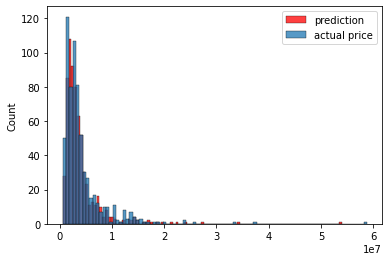

In [48]:
#visualization of the actual price and predicted price
sns.histplot(p, label='prediction',color='red')
sns.histplot(t, label='actual price')
plt.legend();

In [49]:
#comparing the actual price values with the prediction values our model obtained
df_pred = pd.DataFrame(p, columns=['Prediction'])
df_pred['Target'] = t
df_pred['Difference%'] = np.absolute((df_pred['Target'] - df_pred['Prediction'])/df_pred['Target']*100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pred = df_pred.sort_values(by=['Difference%'])
df_pred

,Prediction,Target,Difference%
175,5624784.00,5625000.00,0.00
647,1781286.00,1785000.00,0.21
618,1157531.88,1155000.00,0.22
572,1980907.00,1976000.00,0.25
588,4951018.50,4935000.00,0.32
...,...,...,...
304,2945828.75,1207500.00,143.96
102,5253761.50,2100000.00,150.18
668,17091224.00,6510000.00,162.54
597,2576641.25,892500.00,188.70
